In [30]:
# import pandas as pd
import numpy as np

In [31]:
filePath = 'data.txt'
data = np.genfromtxt(filePath, delimiter=',', skip_header=1)

In [32]:
# transpose data to get features in columns and samples in rows
data_transpose = np.transpose(data)
data_list = data_transpose.tolist()

# now let's seperate data into "White Light Frame (WL)" and "NBI Frame (NBI)"
# 1 for WL and 2 for NBI
data_WL, data_NBI = [],[]
for i in range(len(data_list)):
    if data_list[i][1] == 1:
        data_WL.append(data_list[i])
    elif data_list[i][1] == 2:
        data_NBI.append(data_list[i])

# checking if the separation was done correctely
print(False in [row[1]==1 for row in data_WL])  # should be False
print(False in [row[1]==2 for row in data_NBI]) # should be False
print((len(data_WL)+len(data_NBI))==len(data_list)) # should be True

False
False
True


In [33]:
# separating features and targets out of data_WL and data_NBI
fea_WL = [row[2:] for row in data_WL]
class_WL = [row[0] for row in data_WL]

fea_NBI = [row[2:] for row in data_NBI]
class_NBI = [row[0] for row in data_NBI]

In [16]:
%matplotlib inline

In [34]:
# X -> features, y -> label
X = np.array(fea_NBI + fea_WL)
y = np.array(class_NBI + class_WL)

In [42]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

# create loocv procedure
cv = LeaveOneOut()

y_true, y_pred = [],[]
fea_importances = []

# enumerate splits
for train_ix, test_ix in cv.split(X):
	
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]   
    # fit model
    # model = RandomForestClassifier(random_state=1)
    model = ExtraTreesClassifier(n_estimators=100, random_state=0, criterion='entropy')
    model.fit(X_train, y_train) 
    fea_importances.append(model.feature_importances_)

    # evaluate model
    yhat = model.predict(X_test)
    # store
    y_true.append(y_test[0])
    y_pred.append(yhat[0])

# calculate accuracy
cm = confusion_matrix(y_true, y_pred)
print(cm)
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

[[35  0  7]
 [ 0 20 10]
 [ 6  0 74]]
Accuracy: 0.849


0.08227240814665632


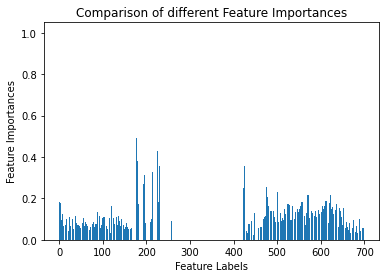

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

mean_fea_imp = np.mean(np.array(fea_importances), axis=0)
feature_importance_normalized = (mean_fea_imp)/np.max(mean_fea_imp)
# print(np.mean(feature_importance_normalized))

# Plotting a Bar Graph to compare the models
plt.bar(range(1,699), feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.savefig('fea.png')
plt.show()

In [76]:
import networkx as nx

from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances

thres = (feature_importance_normalized > 0.2)
print(np.shape(np.transpose(X)[thres]))
sel_fea = np.transpose(np.transpose(X)[thres])
# print(sel_fea)

X_normalized = preprocessing.normalize(sel_fea, norm='l2')
print(X_normalized)
euclidean_dist = euclidean_distances(X_normalized)
squared_euclidean = np.square(euclidean_dist)
print(np.shape(squared_euclidean))

# adj_matrix = 10**(1/similarity_matrix)
adj_matrix = squared_euclidean
np.fill_diagonal(adj_matrix, 0)

print('mean = ', np.mean(adj_matrix[adj_matrix != np.min(adj_matrix)]))
print('max = ', np.max(adj_matrix))
print('min = ', np.min(adj_matrix[adj_matrix != np.min(adj_matrix)]))

adj_matrix[adj_matrix >= -0.115+np.mean(adj_matrix[adj_matrix != np.min(adj_matrix)])] = 0

print(np.count_nonzero(adj_matrix))

G = nx.from_numpy_matrix(adj_matrix, create_using=nx.MultiGraph())

(52, 152)
[[1.95793657e-01 7.15265025e-02 1.68788635e-01 ... 7.52651244e-06
  6.50056504e-06 3.84660720e-06]
 [1.57661756e-01 1.01470122e-01 2.24391982e-01 ... 8.26913395e-06
  6.25888484e-06 2.70496191e-06]
 [5.53191610e-02 9.31327313e-02 2.11580378e-01 ... 4.30166728e-08
  1.28442834e-08 5.13771336e-10]
 ...
 [5.20041001e-02 7.66718773e-02 1.75603332e-01 ... 6.50995006e-07
  2.74968696e-07 2.73797140e-08]
 [3.80473842e-01 8.60567414e-02 1.81164758e-01 ... 9.45635477e-06
  6.40022645e-06 1.43302577e-06]
 [7.35292114e-02 1.36619246e-01 3.62527575e-01 ... 1.46217981e-06
  6.42464328e-07 8.16429539e-08]]
(152, 152)
mean =  0.11877829695937095
max =  0.8400156395738633
min =  0.000547309189027123
300


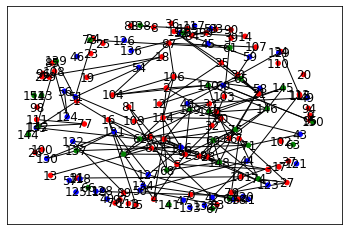

In [77]:
# G.remove_nodes_from(list(nx.isolates(G)))

color_map = []
for i in range(len(G)):
    if y[i] == 1:   # 1 -> hyperplasic
        color_map.append('blue')
    elif y[i] == 2: # 2 -> serrated adenoma
        color_map.append('green')
    elif y[i] == 3: # 3 -> adenoma
        color_map.append('red')

nx.draw_networkx(G, pos=nx.spring_layout(G), node_size=20, node_color=color_map)

In [ ]:
import networkx as nx
G = G=nx.from_numpy_matrix(DistMatrix)
nx.draw(G)